In [1]:
import numpy
import pandas as pd
import numpy as np
import scipy

In [8]:
from Utils import data
path = r"C:\Users\cibei\OneDrive\Desktop\Coding_for_data_science\Python\dscoding-projects\niccolo.cibei\travel_project\travel_project\dataset\worldcities.xlsx"
world_cities_data = data.TravelData(path)
world_cities_data.add_continent_column()
df_city = world_cities_data.get_data()
df_city

,city_ascii,lat,lng,country,iso2,capital,population,id,continent
0,Tokyo,35.6897,139.6922,Japan,JP,primary,3.797700e+07,1392685764,Asia
1,Jakarta,-6.2146,106.8451,Indonesia,ID,primary,3.454000e+07,1360771077,Asia
2,Delhi,28.6600,77.2300,India,IN,admin,2.961700e+07,1356872604,Asia
3,Mumbai,18.9667,72.8333,India,IN,admin,2.335500e+07,1356226629,Asia
4,Manila,14.5958,120.9772,Philippines,PH,primary,2.308800e+07,1608618140,Asia
...,...,...,...,...,...,...,...,...,...
26058,Greytown,10.9167,-83.7000,Nicaragua,NI,minor,2.750000e+02,1558125707,North America
26061,Sayhut,15.2105,51.2454,Yemen,YE,minor,1.890000e+02,1887613470,Asia
26062,Rio Cuarto,-33.1230,-64.3478,Argentina,AR,minor,1.582980e+02,1032552145,South America
26063,La Esmeralda,3.1738,-65.5466,Venezuela,VE,minor,1.500000e+02,1862255876,South America


In [9]:
from Utils import dd

In [38]:
travel_graph = dd.TravelGraph(df_city, graph_type= 'right_only', num_cities=15)

In [41]:
shortest_path = travel_graph.shortest_path(source_city_name= "Berlin",target_city_name= "London")
shortest_path


['Berlin',
 'Gryfino',
 'Bialogard',
 'Gdynia',
 'Svetlogorsk',
 'Silute',
 'Silale',
 'Pakruojis',
 'Birzai',
 'Viesite',
 'Vilani',
 'Opochka',
 'Bologoye',
 'Vologda',
 'Syktyvkar',
 'Khanty-Mansiysk',
 'Krasnoyarsk',
 'Ulan-Ude',
 'Oroqen Zizhiqi',
 'Blagoveshchensk',
 "Komsomol'sk-na-Amure",
 'Magadan',
 'Reykjavik',
 'Dun Dealgan',
 'London']

In [6]:
uu = travel_graph.cycle_tour(start_city_name= 'New York')

KeyboardInterrupt: 

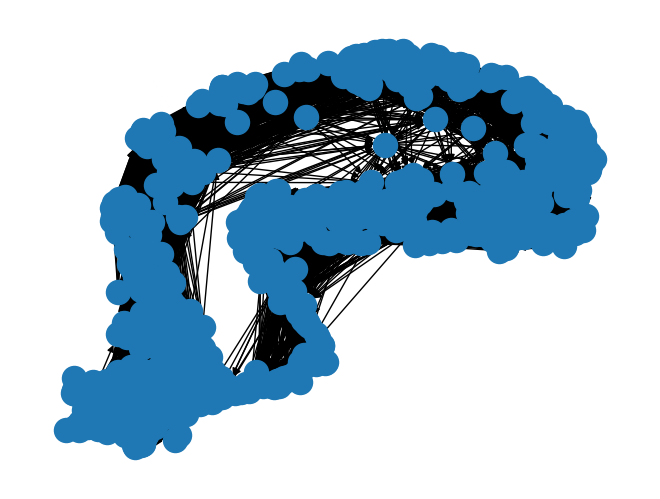

In [9]:
nx.draw(travel_graph.G)

In [45]:
#works!!!
import folium

def create_map(df, s):
    # Create a map centered at the midpoint of the shortest path
    #midpoint_idx = len(s) // 2
    #midpoint_coords = df.loc[df['id'] == s[midpoint_idx], ['lat', 'lng']].values[0]
    mappa = folium.Map(location= df['lat', 'lng'].iloc[0])

    # Add markers for each city along the shortest path
    for city_id in s:
        city_data = df.loc[df['id'] == city_id]
        if not city_data.empty:
            city_coords = city_data[['lat', 'lng']].values[0]
            city_name = city_data['city_ascii'].values[0]
            folium.Marker(city_coords, popup=city_name).add_to(mappa)

    # Create a PolyLine to connect the cities in the shortest path
    locations = [df.loc[df['id'] == city_id, ['lat', 'lng']].values[0] for city_id in s if not df.loc[df['id'] == city_id].empty]
    line = folium.PolyLine(locations=locations, color='blue', weight=5, opacity=0.7)
    line.add_to(mappa)

    # Save the map to an HTML file
    mappa.save('shortest_path_map.html')


create_map(df_city, shortest_path)

KeyError: ('lat', 'lng')

In [25]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(df_cleaned['population'], df_cleaned['lat'])
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Correlation Coefficient: -0.052256911229545136
P-value: 5.972860984468745e-17


In [15]:
from Utils import plotting_plotly
plotting_instance = plotting_plotly.Plotting(df_city)

In [16]:
plotting_instance.path_map(shortest_path)

TypeError: line_mapbox() got an unexpected keyword argument 'line_dash'

In [ ]:
plotting_instance.plot_population_by_country()


In [ ]:
plotting_instance.plot_population_by_continent()


In [ ]:
plotting_instance.create_density_map()
